In [1]:
#pip install pandas numpy networkx matplotlib yfinance seaborn networkx
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import yfinance as yf
import networkx as nx
plt.rcParams["figure.figsize"] = (20, 10)

# Importing stock names and their data

In [304]:
df=pd.read_csv('ind_nifty200list.csv')
mask = ~df['Symbol'].str.endswith('.NS')
df.loc[mask, 'Symbol'] = df.loc[mask, 'Symbol'] + '.NS'
df.head()
stock_list=df['Symbol'].to_list()

In [239]:
Stocks=yf.download(tickers=(df['Symbol']).to_list(),start='2015-08-29',end='2019-08-29')['Close']

[*********************100%***********************]  198 of 198 completed


18 Failed downloads:



[*********************100%***********************]  198 of 198 completed

['SUVENPHAR.NS', 'AETHER.NS', 'ROSSARI.NS', 'KIMS.NS', 'MEDPLUS.NS', 'VIJAYA.NS', 'MTARTECH.NS', 'UTIAMC.NS', 'GRINFRA.NS', 'KALYANKJIL.NS', 'GOCOLORS.NS', 'LICI.NS', 'CLEAN.NS', 'ZOMATO.NS', 'SBICARD.NS', 'DELHIVERY.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1440786600, endDate = 1567017000")
['IIFLWAM.NS']: Exception('%ticker%: No data found, symbol may be delisted')
['HDFC.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-08-29 -> 2019-08-29)')


[****************************129%******************************]  256 of 198 completed

## Understanding Correlations 


In [240]:
#Data preprocessing
Stocks=Stocks.dropna(axis=1) #Removing NaN values
Stocks.head()


AARTIDRUGS.NS  ADANIENT.NS  AMARAJABAT.NS  APOLLOHOSP.NS  \
Date                                                                            
2015-08-31 00:00:00     142.024994    40.949326    1008.049988    1340.199951   
2015-09-01 00:00:00     138.312500    39.232887     988.500000    1310.849976   
2015-09-02 00:00:00     137.524994    38.824211     973.049988    1310.150024   
2015-09-03 00:00:00     138.850006    39.777790     974.200012    1325.750000   
2015-09-04 00:00:00     132.800003    37.816147     948.000000    1312.599976   

                     APOLLOTYRE.NS  ASAHIINDIA.NS  ASHOKLEY.NS  ASIANPAINT.NS  \
Date                                                                            
2015-08-31 00:00:00     180.000000     150.600006    90.300003     848.599976   
2015-09-01 00:00:00     169.649994     147.600006    87.449997     819.099976   
2015-09-02 00:00:00     173.800003     145.649994    85.949997     806.000000   
2015-09-03 00:00:00     172.000000     145.199997    87.650002     826.599976   
2015-09-04 00:00:00     170.199997     143.000000    85.000000     812.849976   

                     AUROPHARMA.NS  AVANTIFEED.NS  ...  TVSMOTOR.NS  \
Date                                               ...                
2015-08-31 00:00:00     753.000000     174.703339  ...   223.649994   
2015-09-01 00:00:00     737.750000     168.393326  ...   216.850006   
2015-09-02 00:00:00     728.500000     167.206665  ...   221.600006   
2015-09-03 00:00:00     734.900024     178.526672  ...   221.550003   
2015-09-04 00:00:00     723.049988     179.663330  ...   223.199997   

                       UFLEX.NS    VEDL.NS  VGUARD.NS  WHIRLPOOL.NS  \
Date                                                                  
2015-08-31 00:00:00  154.850006  98.650002  64.246429    682.200012   
2015-09-01 00:00:00  148.399994  94.750000  63.339287    666.650024   
2015-09-02 00:00:00  149.850006  94.099998  64.303574    661.400024   
2015-09-03 00:00:00  152.500000  98.250000  65.028572    642.250000   
2015-09-04 00:00:00  145.000000  93.250000  64.689285    632.799988   

                     WOCKPHARMA.NS  YESBANK.NS     ZEEL.NS  ZENSARTECH.NS  \
Date                                                                        
2015-08-31 00:00:00    1342.349976  137.889999  384.799988     167.289993   
2015-09-01 00:00:00    1294.250000  133.279999  371.649994     162.509995   
2015-09-02 00:00:00    1295.949951  131.850006  361.000000     162.860001   
2015-09-03 00:00:00    1324.949951  134.339996  367.950012     166.619995   
2015-09-04 00:00:00    1259.900024  129.440002  360.399994     158.710007   

                     ZYDUSLIFE.NS  
Date                               
2015-08-31 00:00:00    379.640015  
2015-09-01 00:00:00    375.760010  
2015-09-02 00:00:00    368.329987  
2015-09-03 00:00:00    373.079987  
2015-09-04 00:00:00    362.519989  

[5 rows x 154 columns]

[*****************************135%********************************]  268 of 198 completed

In [279]:
def calculate_drawdown(prices):
    max_price = prices.cummax()
    drawdown = (prices - max_price) / max_price
    return drawdown

def doomed_stock(df, threshold=0.7):
    doomed_stocks = []
    
    for column in df.columns:
        drawdown = calculate_drawdown(df[column])
        max_drawdown = drawdown.min()
        
        if max_drawdown <= -threshold:
            doomed_stocks.append(column)
    
    return df.drop(columns=doomed_stocks)


In [278]:
len(Stocks.columns),len(doomed_stock(Stocks).columns)

(154, 135)

In [241]:
correlationMatrix=((Stocks.pct_change()).dropna()).corr() #Creating a matrix with percentage change.

[******************************138%********************************]  274 of 198 completed

[******************************139%*********************************]  275 of 198 completed

<Axes: >

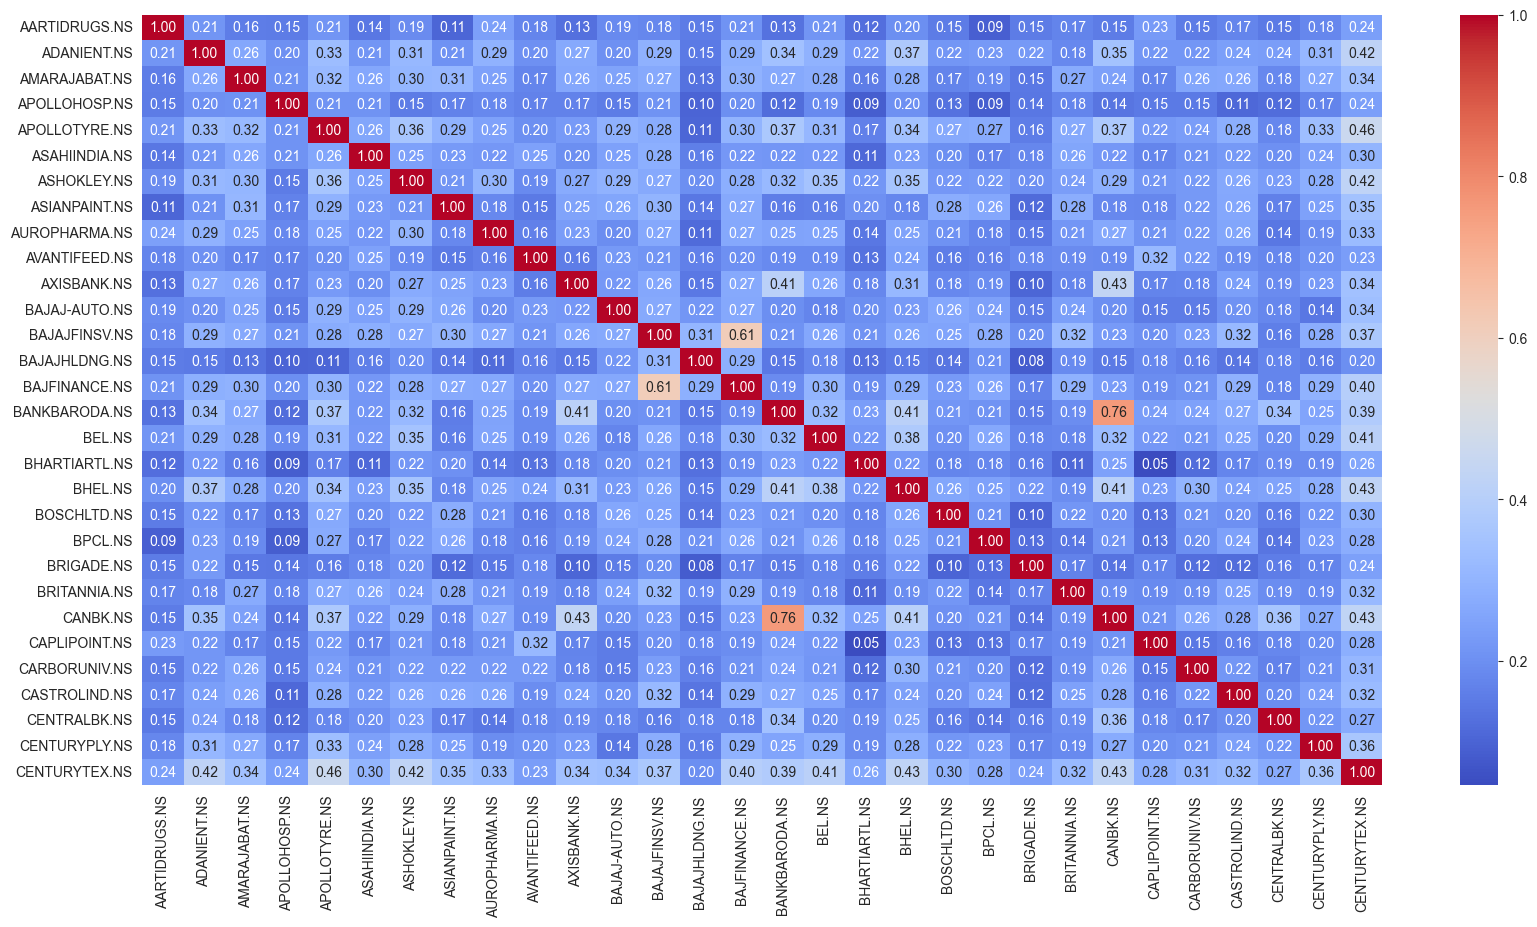

In [242]:
sns.heatmap(correlationMatrix.iloc[:30,:30], annot=True, cmap="coolwarm", fmt=".2f")


In [243]:
correlationMatrix.iloc[:4,:4]

AARTIDRUGS.NS  ADANIENT.NS  AMARAJABAT.NS  APOLLOHOSP.NS
AARTIDRUGS.NS       1.000000     0.214494       0.155308       0.153295
ADANIENT.NS         0.214494     1.000000       0.261790       0.199865
AMARAJABAT.NS       0.155308     0.261790       1.000000       0.205722
APOLLOHOSP.NS       0.153295     0.199865       0.205722       1.000000

In [244]:
max_corr = correlationMatrix.unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr != 1.0]  # Exclude self-correlation
max_corr_pair = max_corr.index[0]
print("Stocks with Positive Correlation:")
print(max_corr_pair, max_corr[0])

min_corr = correlationMatrix.unstack().sort_values(ascending=True)
min_corr_pair = min_corr.index[10]
print("\nStocks with Negative Correlation:")
print(min_corr_pair, min_corr[0])

corr_close_to_zero = correlationMatrix[(correlationMatrix > -0.01) & (correlationMatrix < 0.01)]
corr_close_to_zero = corr_close_to_zero.unstack().sort_values(ascending=True)
corr_close_to_zero_pair = corr_close_to_zero.index[0]
print("\nStocks with Correlation Close to Zero:")
print(corr_close_to_zero_pair, corr_close_to_zero[0])

Stocks with Positive Correlation:
('PNB.NS', 'CANBK.NS') 0.7935257621387145

Stocks with Negative Correlation:
('FEDERALBNK.NS', 'MPHASIS.NS') -0.033586280981864454

Stocks with Correlation Close to Zero:
('SHARDACROP.NS', 'TCS.NS') -0.008923640905300142


In [245]:
max_corr

PNB.NS         CANBK.NS         0.793526
CANBK.NS       PNB.NS           0.793526
SBIN.NS        CANBK.NS         0.775940
CANBK.NS       SBIN.NS          0.775940
BPCL.NS        HINDPETRO.NS     0.767789
                                  ...   
CASTROLIND.NS  TCS.NS          -0.021661
TCS.NS         LINDEINDIA.NS   -0.028113
LINDEINDIA.NS  TCS.NS          -0.028113
               HCLTECH.NS      -0.033586
HCLTECH.NS     LINDEINDIA.NS   -0.033586
Length: 23562, dtype: float64

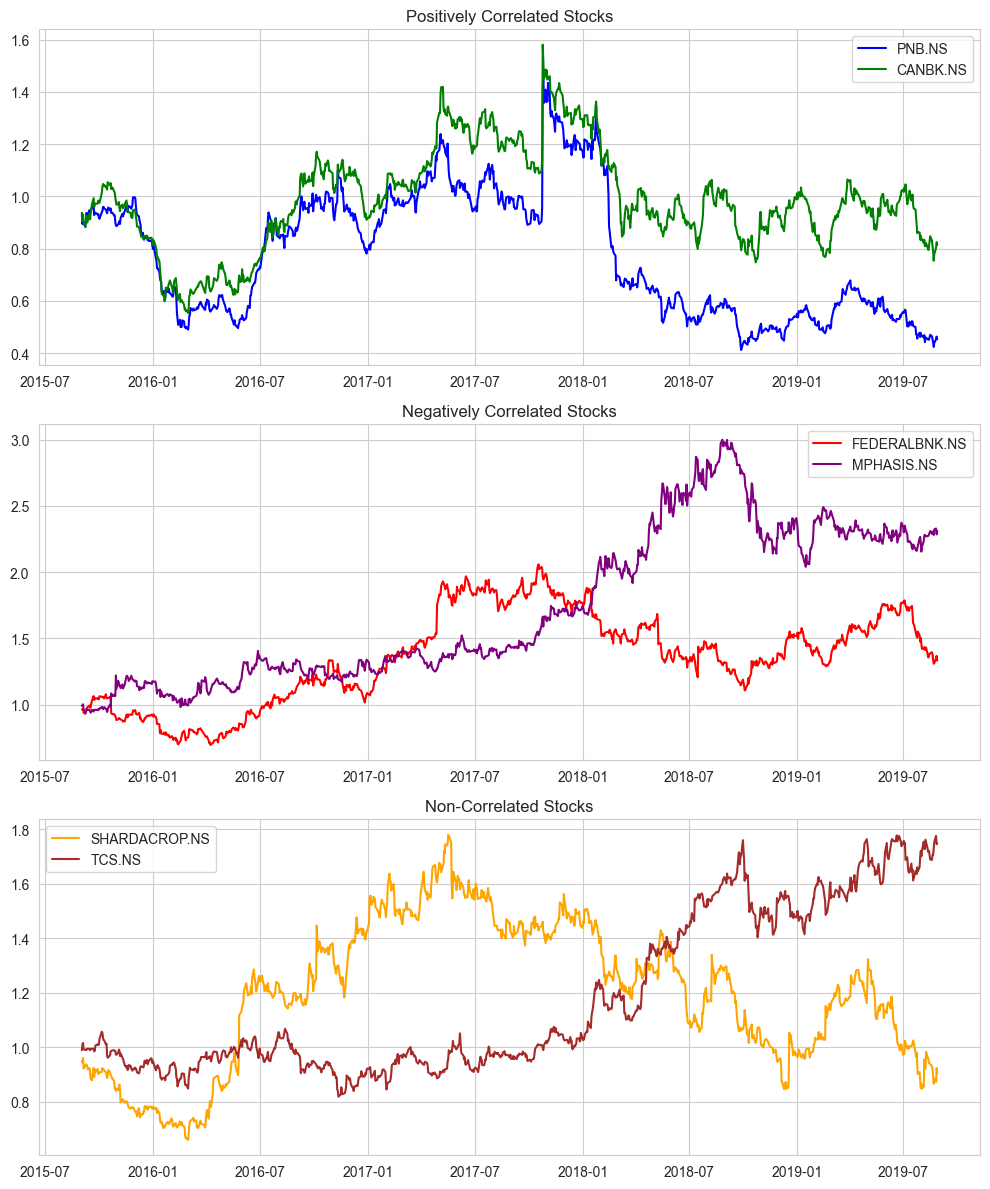

In [246]:
# These are the stock pairs with maximum correlation, minimum correlation, and close to zero correlation

# Calculate the cumulative product of daily returns for each stock
Stock1 = np.cumprod(Stocks[max_corr_pair[0]].pct_change() + 1)
Stock2 = np.cumprod(Stocks[max_corr_pair[1]].pct_change() + 1)

Stock3 = np.cumprod(Stocks[min_corr_pair[0]].pct_change() + 1)
Stock4 = np.cumprod(Stocks[min_corr_pair[1]].pct_change() + 1)

Stock5 = np.cumprod(Stocks[corr_close_to_zero_pair[0]].pct_change() + 1)
Stock6 = np.cumprod(Stocks[corr_close_to_zero_pair[1]].pct_change() + 1)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Positively Correlated
axes[0].plot(Stock1, label=max_corr_pair[0], color='blue')
axes[0].plot(Stock2, label=max_corr_pair[1], color='green')
axes[0].set_title('Positively Correlated Stocks')
axes[0].legend()

# Negatively Correlated
axes[1].plot(Stock3, label=min_corr_pair[0], color='red')
axes[1].plot(Stock4, label=min_corr_pair[1], color='purple')
axes[1].set_title('Negatively Correlated Stocks')
axes[1].legend()

# Non-Correlated
axes[2].plot(Stock5, label=corr_close_to_zero_pair[0], color='orange')
axes[2].plot(Stock6, label=corr_close_to_zero_pair[1], color='brown')
axes[2].set_title('Non-Correlated Stocks')
axes[2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



# Introduction to Graph Theory

## What is a Graph?

- A graph is a mathematical and data structure representation of a set of objects, where some pairs of the objects are connected by links.
- These objects are called **vertices** (or nodes), and the links are called **edges**.

## Basic Components of a Graph

- **Vertex (Node):** Represents an entity or element.
- **Edge (Link):** Represents a relationship between two vertices.
- **Degree of a Vertex:** The number of edges connected to a vertex.
- **Directed Graph:** Edges have a direction.
- **Undirected Graph:** Edges have no direction.

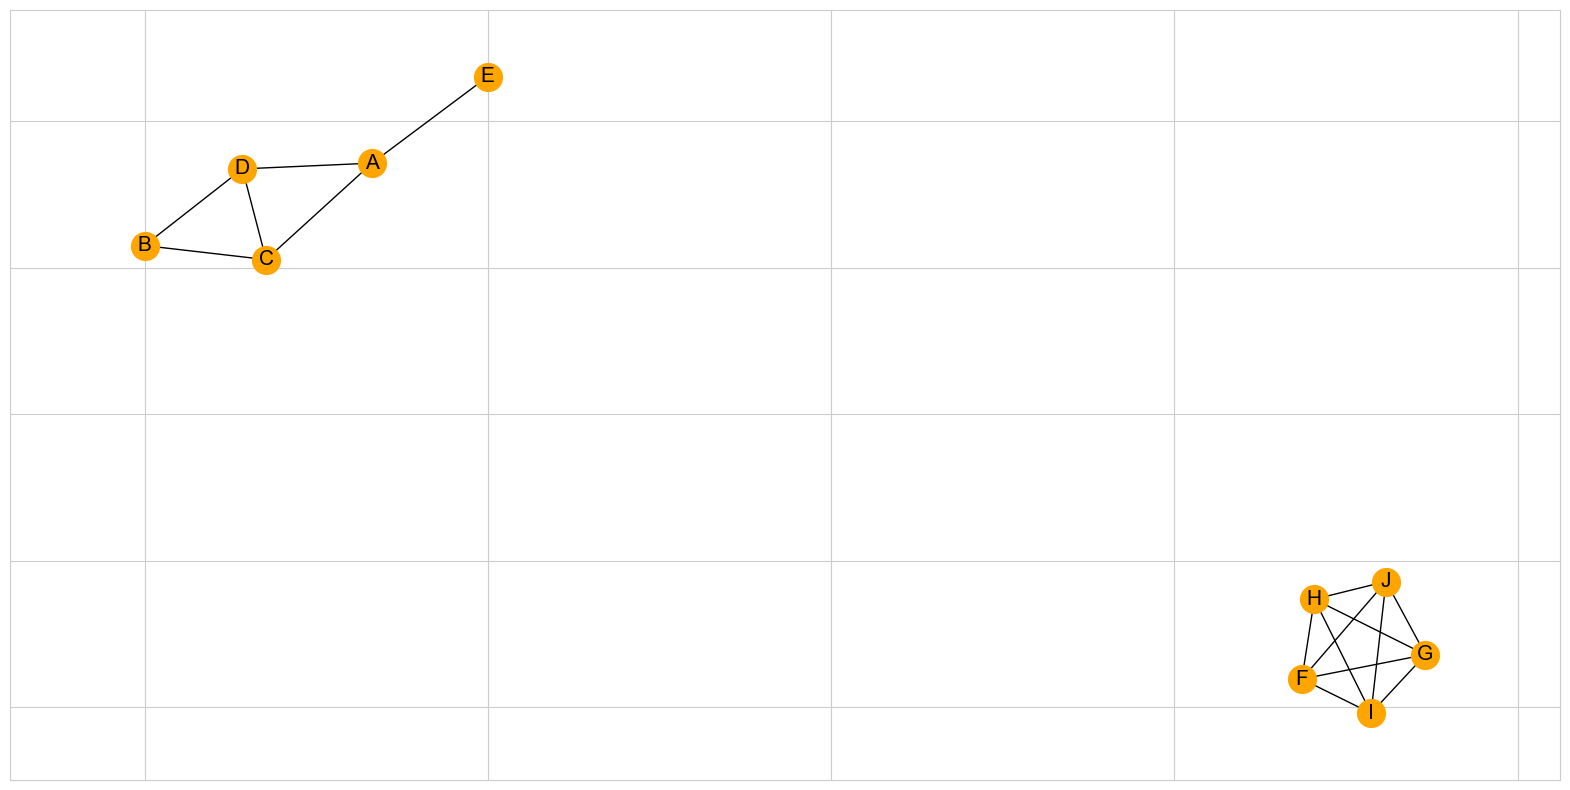

In [247]:
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
dfx = pd.DataFrame({ 'A':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
 
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = dfx.corr()
 
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw_networkx(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

In [248]:
corr

A         B         C         D         E         F         G  \
A  1.000000  0.791943  0.849340  0.940775  0.915132 -0.409401 -0.437545   
B  0.791943  1.000000  0.812956  0.826112  0.736671 -0.134618 -0.155917   
C  0.849340  0.812956  1.000000  0.863998  0.718474 -0.191389 -0.224841   
D  0.940775  0.826112  0.863998  1.000000  0.774506 -0.206298 -0.213928   
E  0.915132  0.736671  0.718474  0.774506  1.000000 -0.523507 -0.577824   
F -0.409401 -0.134618 -0.191389 -0.206298 -0.523507  1.000000  0.983400   
G -0.437545 -0.155917 -0.224841 -0.213928 -0.577824  0.983400  1.000000   
H -0.401451 -0.127738 -0.215552 -0.217662 -0.470211  0.981475  0.972737   
I -0.302059 -0.119546 -0.070308 -0.132489 -0.419847  0.970883  0.948152   
J -0.442672 -0.239103 -0.264162 -0.274649 -0.570022  0.965280  0.929486   

          H         I         J  
A -0.401451 -0.302059 -0.442672  
B -0.127738 -0.119546 -0.239103  
C -0.215552 -0.070308 -0.264162  
D -0.217662 -0.132489 -0.274649  
E -0.470211 -0.419847 -0.570022  
F  0.981475  0.970883  0.965280  
G  0.972737  0.948152  0.929486  
H  1.000000  0.960705  0.915097  
I  0.960705  1.000000  0.935197  
J  0.915097  0.935197  1.000000

In [249]:
correlationMatrix=correlationMatrix.fillna(1)

In [250]:
correlationMatrix.to_csv('matrix4.csv')

# Plotting a Graph where a stock is connected to its nearest component

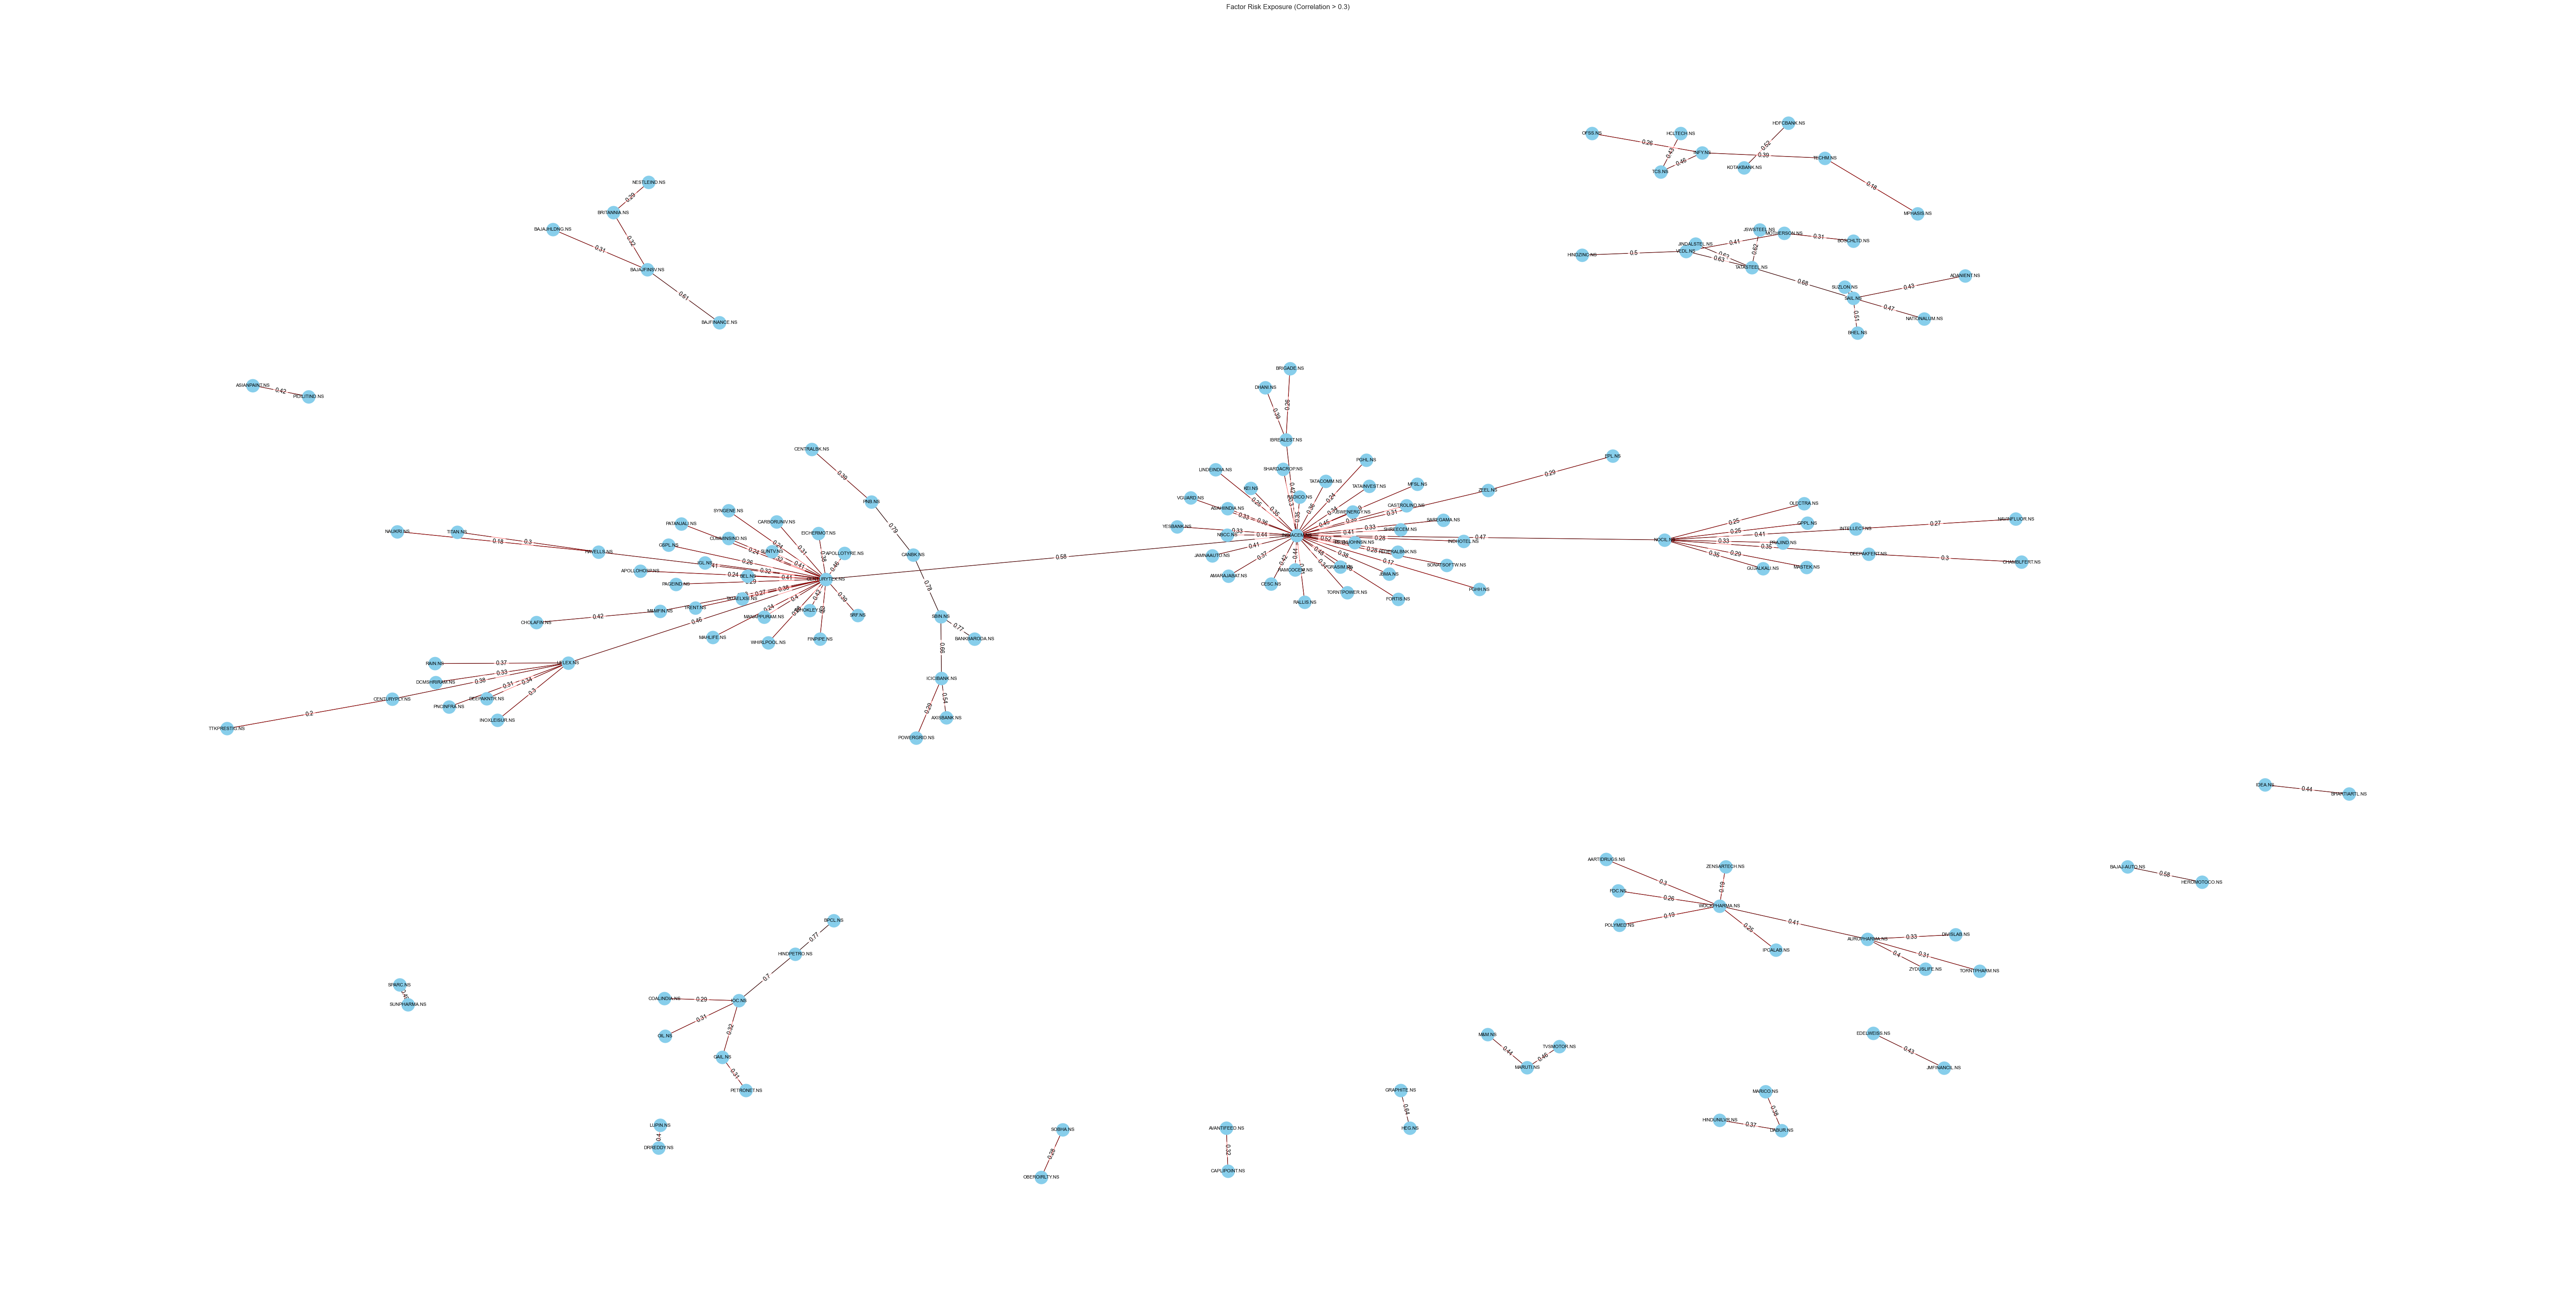

In [251]:
correlation_matrix = correlationMatrix

# Create a graph
G = nx.Graph()

# Add nodes (stock names) to the graph
G.add_nodes_from(correlation_matrix.columns)

# Find the three most correlated stocks for each stock
for stock in correlation_matrix.columns:
    top_correlated_stocks = correlation_matrix[stock].nlargest(2).index.tolist()[1:]  # Exclude the stock itself
    for other_stock in top_correlated_stocks:
        correlation_value = round(correlation_matrix.loc[stock, other_stock], 2)
        
        G.add_edge(stock, other_stock, weight=correlation_value)

# Get the positions of the nodes for plotting (using spring_layout for better visualization)
pos = nx.spring_layout(G, seed=42)

# Get edge weights for edge lengths
edge_weights = nx.get_edge_attributes(G, 'weight')

# Draw the graph
plt.figure(figsize=(80, 40))
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=10)
nx.draw_networkx_edges(G, pos, width=[1* (1-e) for e in edge_weights.values()], alpha=0.7, edge_color='r')
plt.title("Factor Risk Exposure (Correlation > 0.3)")
plt.axis("off")
plt.show()


# Create a graphical representation of stock connections, where stocks are linked to one another only if their correlation falls below a defined threshold value

In [252]:

def create_graph_with_threshold(correlation_matrix, threshold):
    # Create a graph
    G = nx.Graph()

    # Add nodes (stock names) to the graph
    G.add_nodes_from(correlation_matrix.columns)

    # Find the most correlated stocks for each stock based on the provided threshold
    for stock in correlation_matrix.columns:
        correlated_stocks = correlation_matrix[stock][(correlation_matrix[stock] <= threshold) ].index.tolist()
        for other_stock in correlated_stocks:
            correlation_value = round(correlation_matrix.loc[stock, other_stock], 2)
            G.add_edge(stock, other_stock, weight=correlation_value)

    return G





In [308]:

# Set your desired threshold value here
threshold_value = 0.2

# Create the graph with the specified threshold
G = create_graph_with_threshold((Stocks.pct_change()).corr(), threshold_value)

#Get the positions of the nodes for plotting (using spring_layout for better visualization)
pos = nx.spring_layout(G, seed=42)

#Get edge weights for edge lengths
edge_weights = nx.get_edge_attributes(G, 'weight')

In [254]:
(Stocks.iloc[:, 0:4].pct_change()).corr()

AARTIDRUGS.NS  ADANIENT.NS  AMARAJABAT.NS  APOLLOHOSP.NS
AARTIDRUGS.NS       1.000000     0.214494       0.155308       0.153295
ADANIENT.NS         0.214494     1.000000       0.261790       0.199865
AMARAJABAT.NS       0.155308     0.261790       1.000000       0.205722
APOLLOHOSP.NS       0.153295     0.199865       0.205722       1.000000

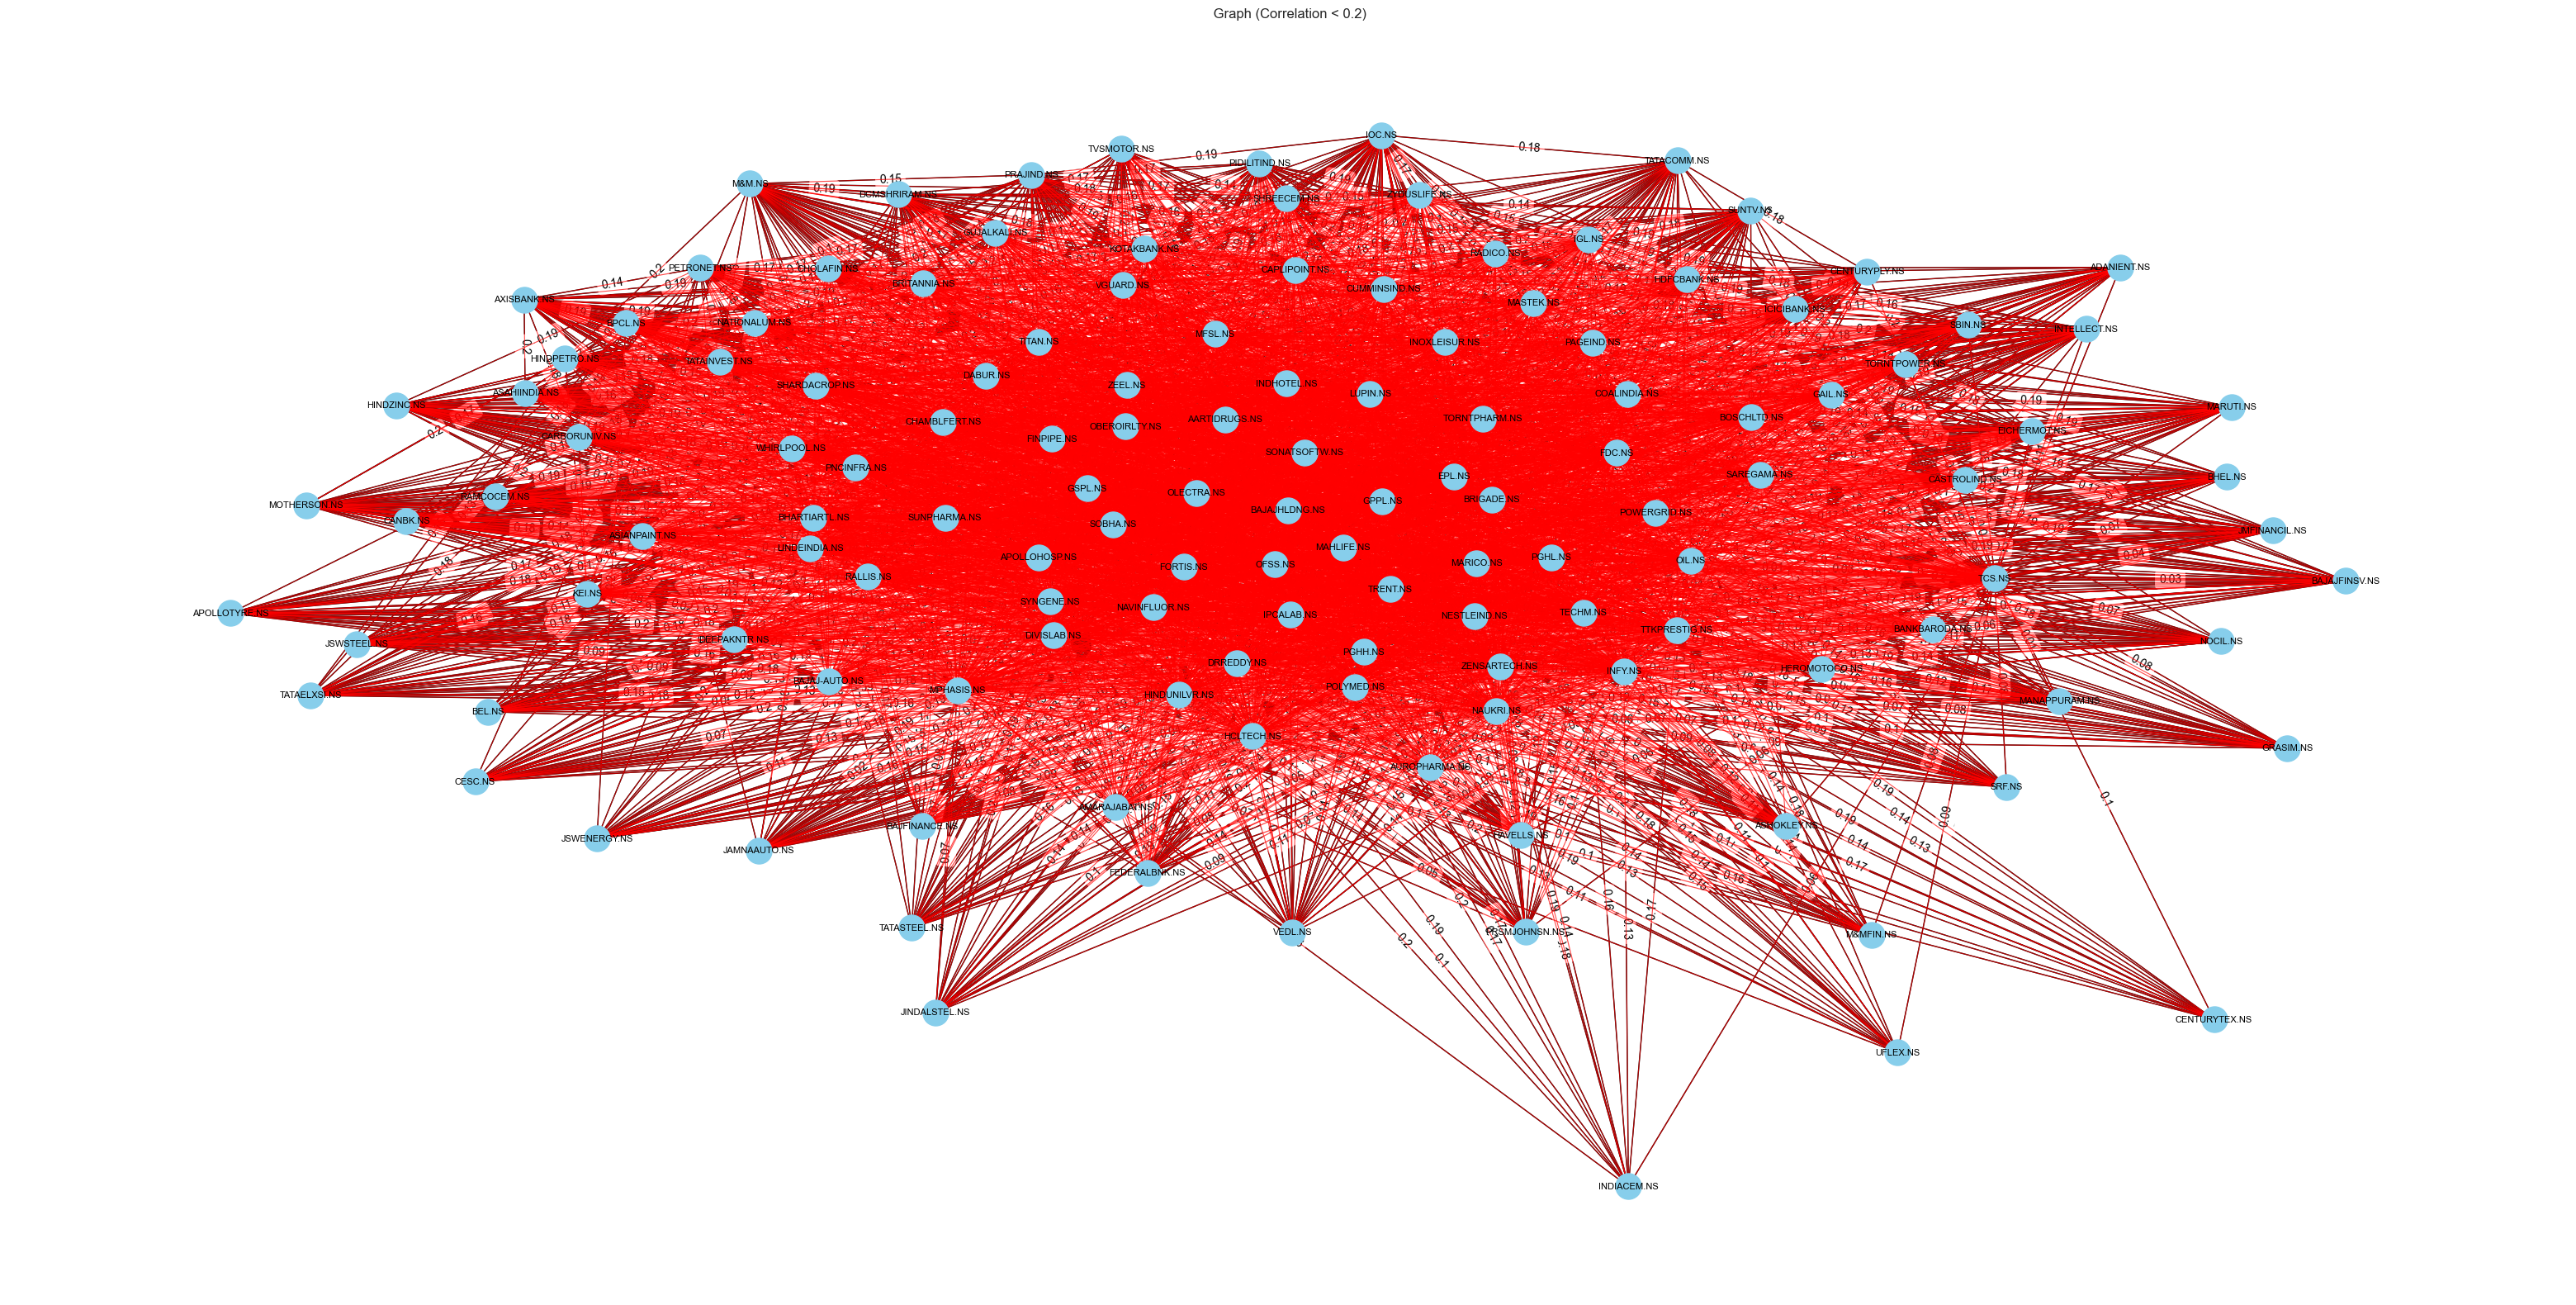

CPU times: total: 10.9 s
Wall time: 13.3 s


In [255]:
%%time
#Draw the graph
plt.figure(figsize=(40, 20))
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=10)
nx.draw_networkx_edges(G, pos, width=[1 * (1 - e) for e in edge_weights.values()], alpha=0.7, edge_color='r')
plt.title(f" Graph (Correlation < {threshold_value})")
plt.axis("off")
plt.show() 

# Complete Subgraph in Graph Theory

In graph theory, a **complete subgraph** is a fundamental concept that describes a subset of vertices within a graph where every possible pair of vertices is connected by an edge. This type of subgraph is also known as a **clique**.

## Key Characteristics of a Complete Subgraph

A complete subgraph exhibits the following key characteristics:

1. **Edge Existence**: In a complete subgraph, every pair of vertices is connected by an edge. This implies that there are no isolated vertices within the subgraph.

2. **Maximum Connectivity**: A complete subgraph is maximally connected because it includes all possible edges between its vertices.

3. **Subset of Original Graph**: It is a subset of the original graph, meaning that all vertices in the complete subgraph are also vertices in the parent graph.

4. **Size Variability**: Complete subgraphs can vary in size, ranging from just two vertices (a single edge) to larger subsets encompassing multiple vertices.

5. **Common Applications**: Complete subgraphs are used in various applications, including social network analysis, clustering, and the identification of highly interconnected groups of elements.

## Mathematical Notation

In mathematical notation, a complete subgraph is often denoted as **K<sub>n</sub>**, where **n** represents the number of vertices in the subgraph. For example, **K<sub>3</sub>** represents a complete subgraph with three vertices.



In [309]:
##Finding a Large complete subgraph

def find_largest_complete_subgraph(graph):
    # Initialize variables to keep track of the largest clique found so far
    largest_clique = None
    largest_clique_size = 0
    
    # Iterate over all cliques in the graph
    for clique in nx.find_cliques(graph):
        
        # Check if the current clique is larger than the previously found largest clique
        if len(clique) > largest_clique_size:
            largest_clique = clique
            largest_clique_size = len(clique)
    return largest_clique


In [310]:
%%time
# Find the largest complete subgraph
largest_subgraph = find_largest_complete_subgraph(G)
# Print the nodes of the largest complete subgraph
print("Nodes in the largest complete subgraph:", largest_subgraph,len(largest_subgraph))


Nodes in the largest complete subgraph: ['MPHASIS.NS', 'PGHH.NS', 'NAUKRI.NS', 'TTKPRESTIG.NS', 'ZENSARTECH.NS', 'POLYMED.NS', 'INFY.NS', 'IPCALAB.NS', 'NAVINFLUOR.NS', 'FORTIS.NS', 'GPPL.NS', 'PGHL.NS', 'MAHLIFE.NS', 'TRENT.NS', 'IGL.NS', 'APOLLOHOSP.NS', 'MFSL.NS', 'BAJAJHLDNG.NS', 'INDHOTEL.NS', 'ZEEL.NS', 'KOTAKBANK.NS', 'SOBHA.NS', 'BHARTIARTL.NS', 'PAGEIND.NS', 'FINPIPE.NS', 'INOXLEISUR.NS', 'NESTLEIND.NS', 'TITAN.NS', 'SHARDACROP.NS', 'CHAMBLFERT.NS', 'SONATSOFTW.NS', 'SYNGENE.NS', 'AARTIDRUGS.NS', 'FDC.NS', 'GRAPHITE.NS', 'LINDEINDIA.NS', 'CENTRALBK.NS', 'CASTROLIND.NS', 'PATANJALI.NS', 'COALINDIA.NS', 'CUMMINSIND.NS', 'TORNTPHARM.NS'] 42
CPU times: total: 26.1 s
Wall time: 28.3 s


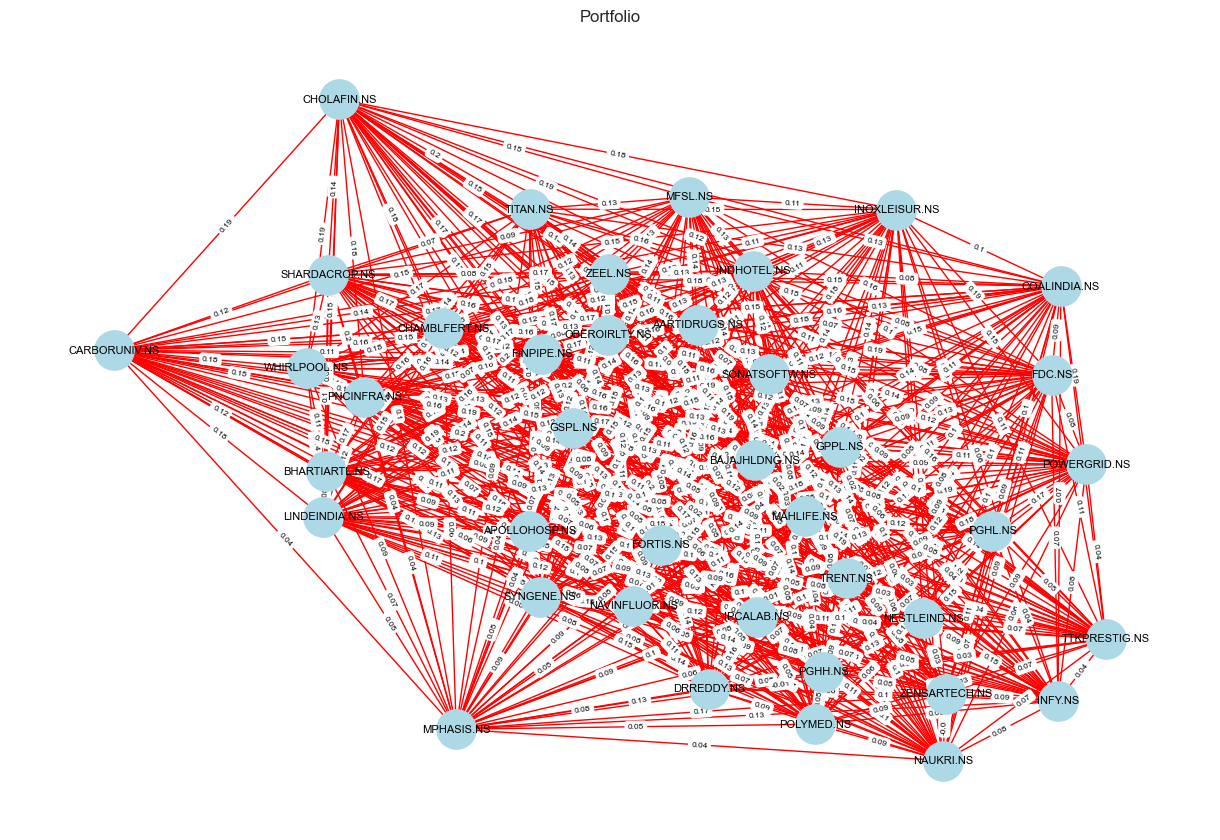

In [283]:
# Plotting the subgraph with edge weights
nodes_to_show = largest_subgraph

# Create a subgraph containing only the specified nodes
subgraph = G.subgraph(nodes_to_show)

# Get the positions of the nodes for the subgraph (using the same layout as the original graph)
pos = nx.spring_layout(G, seed=42)

# Get edge weights for the subgraph
subgraph_edge_weights = nx.get_edge_attributes(subgraph, 'weight')

# Draw the subgraph
plt.figure(figsize=(12, 8))
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=8, font_color='black', edge_color='red')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=subgraph_edge_weights, font_size=6)
plt.title('Portfolio')
plt.show()

In [311]:
Stock_Portfolio=df[df['Symbol'].isin(largest_subgraph)]


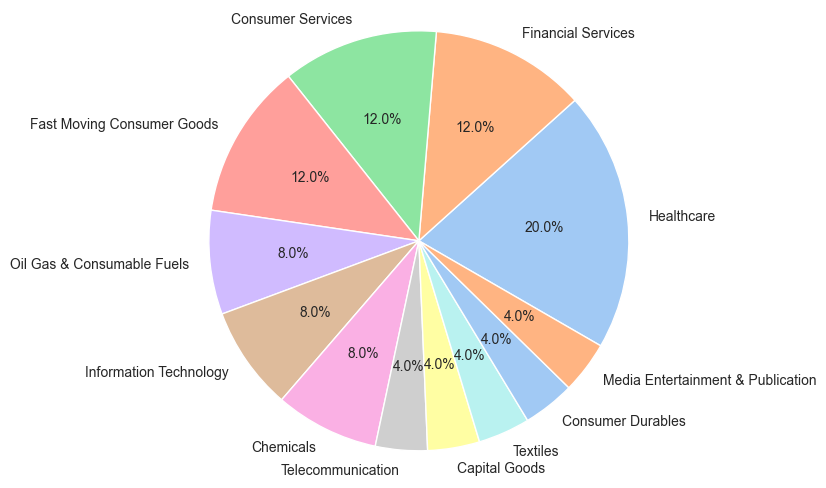

In [312]:
industry_counts = Stock_Portfolio['Industry'].value_counts()
industry_percentages = industry_counts / industry_counts.sum() * 100

# Create a pie chart using Seaborn
plt.figure(figsize=(10, 6))

sns.set_palette("pastel")
sns.set_style("whitegrid")
plt.pie(industry_percentages, labels=industry_percentages.index, autopct='%1.1f%%', startangle=-30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()





In [313]:
largest_subgraph

['MPHASIS.NS',
 'PGHH.NS',
 'NAUKRI.NS',
 'TTKPRESTIG.NS',
 'ZENSARTECH.NS',
 'POLYMED.NS',
 'INFY.NS',
 'IPCALAB.NS',
 'NAVINFLUOR.NS',
 'FORTIS.NS',
 'GPPL.NS',
 'PGHL.NS',
 'MAHLIFE.NS',
 'TRENT.NS',
 'IGL.NS',
 'APOLLOHOSP.NS',
 'MFSL.NS',
 'BAJAJHLDNG.NS',
 'INDHOTEL.NS',
 'ZEEL.NS',
 'KOTAKBANK.NS',
 'SOBHA.NS',
 'BHARTIARTL.NS',
 'PAGEIND.NS',
 'FINPIPE.NS',
 'INOXLEISUR.NS',
 'NESTLEIND.NS',
 'TITAN.NS',
 'SHARDACROP.NS',
 'CHAMBLFERT.NS',
 'SONATSOFTW.NS',
 'SYNGENE.NS',
 'AARTIDRUGS.NS',
 'FDC.NS',
 'GRAPHITE.NS',
 'LINDEINDIA.NS',
 'CENTRALBK.NS',
 'CASTROLIND.NS',
 'PATANJALI.NS',
 'COALINDIA.NS',
 'CUMMINSIND.NS',
 'TORNTPHARM.NS']

In [314]:
##Nifty 500 - ^CRSLDX
##Nifty 50 - ^NSEI
##Nifty 100 - ^CNX100
##Nifty next 50 - ^NSMIDCP
start_date=Stocks.index[-1]+ pd.DateOffset(months=0)
end_date=Stocks.index[-1]+ pd.DateOffset(months=12*4)
index=yf.download(tickers=(Stocks.dropna(axis=1).columns).to_list(),start=start_date,end=end_date)['Close']


[*********************100%***********************]  154 of 154 completed


In [315]:
pfolio=yf.download(tickers=largest_subgraph,start=start_date,end=end_date)['Close']

[*********************100%***********************]  42 of 42 completed


In [316]:
pfolio

AARTIDRUGS.NS  APOLLOHOSP.NS  BAJAJHLDNG.NS  BHARTIARTL.NS  \
Date                                                                     
2019-08-28     115.550003    1521.400024    3303.649902     345.799988   
2019-08-29     114.987503    1518.349976    3310.300049     343.500000   
2019-08-30     116.362503    1508.150024    3252.050049     346.799988   
2019-09-03     115.250000    1493.449951    3262.699951     336.850006   
2019-09-04     114.150002    1496.900024    3304.500000     345.700012   
...                   ...            ...            ...            ...   
2023-08-21     558.400024    4932.649902    7001.799805     871.950012   
2023-08-22     573.400024    4919.649902    7072.200195     877.650024   
2023-08-23     570.250000    4945.600098    7072.000000     868.150024   
2023-08-24     560.250000    4919.950195    7152.200195     869.450012   
2023-08-25     538.250000    4865.500000    7223.100098     873.500000   

            CASTROLIND.NS  CENTRALBK.NS  CHAMBLFERT.NS  COALINDIA.NS  \
Date                                                                   
2019-08-28     123.800003     19.549999     152.550003    185.050003   
2019-08-29     121.650002     18.950001     154.100006    189.000000   
2019-08-30     122.849998     19.750000     154.899994    184.750000   
2019-09-03     120.099998     18.850000     152.550003    181.050003   
2019-09-04     120.199997     18.950001     157.800003    182.149994   
...                   ...           ...            ...           ...   
2023-08-21     146.600006     34.500000     261.049988    230.100006   
2023-08-22     145.000000     34.400002     264.049988    230.750000   
2023-08-23     144.300003     35.750000     269.899994    230.899994   
2023-08-24     141.800003     35.849998     272.299988    229.250000   
2023-08-25     144.949997     35.750000     269.799988    227.699997   

            CUMMINSIND.NS      FDC.NS  ...  SHARDACROP.NS    SOBHA.NS  \
Date                                   ...                              
2019-08-28     569.599976  160.800003  ...     282.049988  526.549988   
2019-08-29     569.599976  160.500000  ...     284.100006  537.750000   
2019-08-30     574.750000  161.300003  ...     275.899994  535.700012   
2019-09-03     558.950012  160.699997  ...     274.200012  534.700012   
2019-09-04     563.799988  162.899994  ...     270.250000  534.750000   
...                   ...         ...  ...            ...         ...   
2023-08-21    1752.099976  389.549988  ...     422.049988  579.099976   
2023-08-22    1753.199951  388.799988  ...     421.899994  577.500000   
2023-08-23    1737.699951  390.250000  ...     437.600006  581.900024   
2023-08-24    1720.250000  385.350006  ...     431.200012  586.000000   
2023-08-25    1714.750000  382.299988  ...     423.850006  588.450012   

            SONATSOFTW.NS  SYNGENE.NS     TITAN.NS  TORNTPHARM.NS  \
Date                                                                
2019-08-28     238.312500  303.549988  1110.949951     834.400024   
2019-08-29     236.324997  305.500000  1101.800049     837.474976   
2019-08-30     230.925003  309.450012  1105.099976     853.799988   
2019-09-03     234.787506  309.299988  1059.650024     856.700012   
2019-09-04     228.487503  313.500000  1037.199951     845.299988   
...                   ...         ...          ...            ...   
2023-08-21    1033.900024  810.799988  3078.300049    1975.750000   
2023-08-22    1022.049988  816.049988  3075.600098    1976.599976   
2023-08-23    1020.900024  804.400024  3070.000000    1938.500000   
2023-08-24    1030.650024  796.400024  3061.199951    1961.949951   
2023-08-25    1018.299988  766.349976  3067.199951    1937.800049   

               TRENT.NS  TTKPRESTIG.NS     ZEEL.NS  ZENSARTECH.NS  
Date                                                               
2019-08-28   475.200012     569.770020  364.200012     216.899994  
2019-08-29   469.250000     577.135010  362.100006     221.7

In [317]:
((pfolio.iloc[-1]-pfolio.iloc[0])/pfolio.iloc[0]).sort_values()

ZEEL.NS          -0.270319
SOBHA.NS          0.117558
PGHL.NS           0.137353
CASTROLIND.NS     0.170840
KOTAKBANK.NS      0.198969
COALINDIA.NS      0.230478
IGL.NS            0.323525
TTKPRESTIG.NS     0.365639
GPPL.NS           0.472486
SHARDACROP.NS     0.502748
PGHH.NS           0.545808
GRAPHITE.NS       0.628734
CHAMBLFERT.NS     0.768600
INFY.NS           0.769595
NESTLEIND.NS      0.772612
CENTRALBK.NS      0.828645
IPCALAB.NS        0.895871
FINPIPE.NS        1.075231
NAUKRI.NS         1.098835
MFSL.NS           1.106915
PAGEIND.NS        1.175403
BAJAJHLDNG.NS     1.186400
TORNTPHARM.NS     1.322387
ZENSARTECH.NS     1.368373
FDC.NS            1.377487
MPHASIS.NS        1.446536
SYNGENE.NS        1.524625
BHARTIARTL.NS     1.526027
PATANJALI.NS      1.590928
FORTIS.NS         1.725378
TITAN.NS          1.760880
INDHOTEL.NS       1.829303
CUMMINSIND.NS     2.010446
APOLLOHOSP.NS     2.198041
TRENT.NS          3.238215
SONATSOFTW.NS     3.272961
MAHLIFE.NS        3.340261
A

In [318]:
correlationMatrix=((np.cumprod(1+Stocks[largest_subgraph].pct_change())).dropna()).corr() #Creating a matrix with percentage change.

<Axes: >

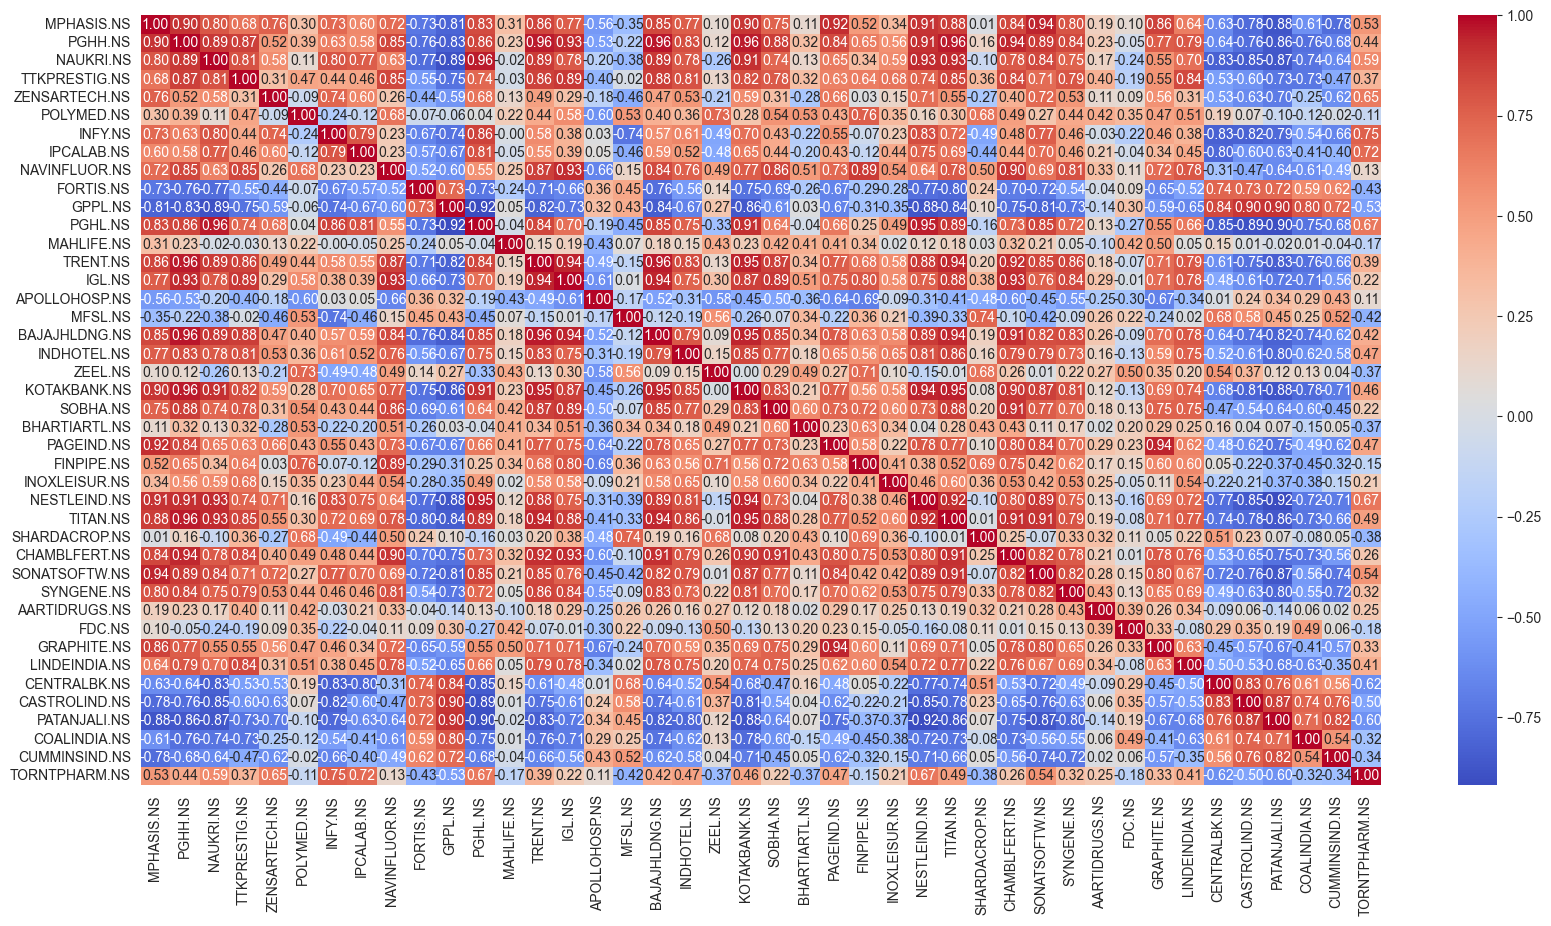

In [319]:
sns.heatmap(correlationMatrix, annot=True, cmap="coolwarm", fmt=".2f")


In [320]:
finalp=pfolio.pct_change().sum(axis=1)/len(pfolio.columns)

In [321]:
index

AARTIDRUGS.NS  ADANIENT.NS  AMARAJABAT.NS  APOLLOHOSP.NS  \
Date                                                                   
2019-08-28     115.550003   135.949997     612.599976    1521.400024   
2019-08-29     114.987503   132.350006     609.250000    1518.349976   
2019-08-30     116.362503   137.350006     620.200012    1508.150024   
2019-09-03     115.250000   135.250000     619.799988    1493.449951   
2019-09-04     114.150002   134.949997     622.700012    1496.900024   
...                   ...          ...            ...            ...   
2023-08-21     558.400024  2639.750000     627.799988    4932.649902   
2023-08-22     573.400024  2698.050049     628.200012    4919.649902   
2023-08-23     570.250000  2530.300049     626.000000    4945.600098   
2023-08-24     560.250000  2539.550049     625.049988    4919.950195   
2023-08-25     538.250000  2495.750000     624.200012    4865.500000   

            APOLLOTYRE.NS  ASAHIINDIA.NS  ASHOKLEY.NS  ASIANPAINT.NS  \
Date                                                                   
2019-08-28     168.550003     182.850006    66.750000    1603.150024   
2019-08-29     169.600006     185.100006    65.750000    1615.250000   
2019-08-30     171.250000     181.199997    64.449997    1616.199951   
2019-09-03     170.250000     178.350006    65.349998    1576.750000   
2019-09-04     175.899994     179.449997    62.599998    1535.150024   
...                   ...            ...          ...            ...   
2023-08-21     398.799988     493.600006   186.850006    3182.300049   
2023-08-22     393.950012     506.850006   187.899994    3179.699951   
2023-08-23     393.350006     502.750000   187.600006    3168.800049   
2023-08-24     395.600006     510.600006   185.850006    3225.600098   
2023-08-25     389.149994     558.700012   185.949997    3259.300049   

            AUROPHARMA.NS  AVANTIFEED.NS  ...  TVSMOTOR.NS    UFLEX.NS  \
Date                                      ...                            
2019-08-28     591.099976     309.450012  ...   359.750000  211.000000   
2019-08-29     591.099976     307.149994  ...   354.200012  207.000000   
2019-08-30     600.700012     318.000000  ...   352.950012  205.250000   
2019-09-03     605.049988     312.750000  ...   361.049988  203.000000   
2019-09-04     599.150024     317.149994  ...   366.149994  205.399994   
...                   ...            ...  ...          ...         ...   
2023-08-21     853.400024     405.700012  ...  1349.500000  376.049988   
2023-08-22     842.650024     415.100006  ...  1353.550049  375.049988   
2023-08-23     838.849976     422.250000  ...  1355.300049  372.299988   
2023-08-24     833.650024     424.850006  ...  1362.500000  376.899994   
2023-08-25     828.500000     425.799988  ...  1339.599976  374.799988   

               VEDL.NS   VGUARD.NS  WHIRLPOOL.NS  WOCKPHARMA.NS  YESBANK.NS  \
Date                                                                          
2019-08-28  132.350006  226.250000   1538.750000     252.300003   59.500000   
2019-08-29  135.750000  229.000000   1549.500000     246.399994   57.400002   
2019-08-30  139.149994  232.100006   1547.400024     244.899994   59.950001   
2019-09-03  134.149994  230.449997   1604.150024     238.350006   58.750000   
2019-09-04  136.699997  222.350006   1626.000000     233.649994   59.450001   
...                ...         ...           ...            ...         ...   
2023-08-21  234.350006  307.700012   1595.500000     231.100006   16.950001   
2023-08-22  235.000000  307.500000   1625.900024     233.500000   16.950001   
2023-08-23  238.000000  311.200012   1627.349976     231.850006   17.000000   
2023-08-24  237.550003  315.149994   1645.949951     235.850006   16.950001   
2023-08-25  233.300003  313.100006   1635.750000     227.449997   16.850000   

               ZEEL.NS  ZENSARTECH.NS  ZYDUSLIFE.NS  
Date                                                 
2019-08-28  364.200012     216.899994  

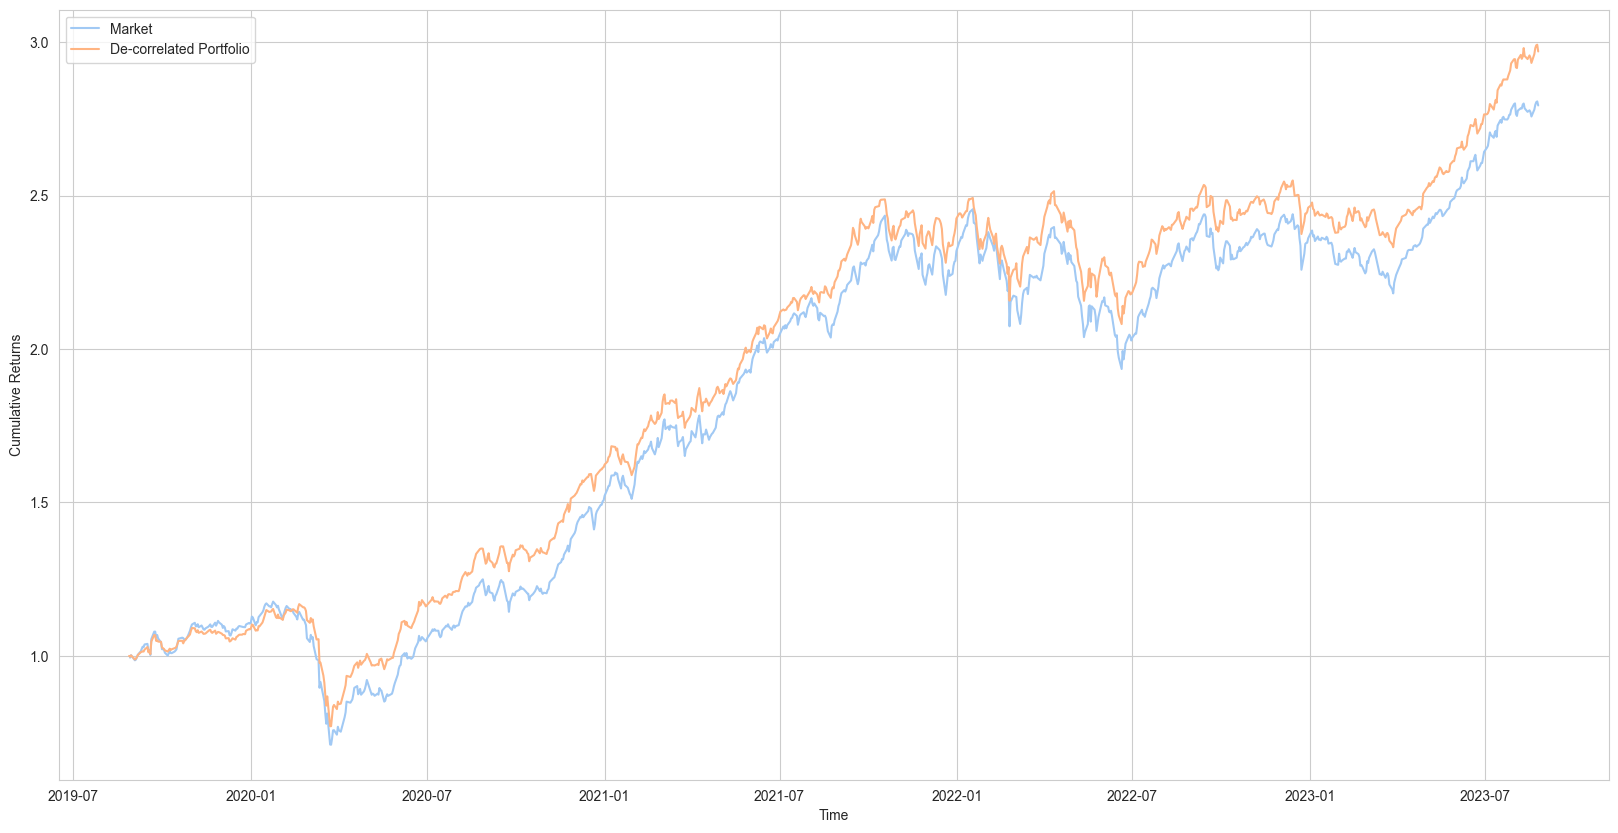

Market Percentage Return: 179.36%
De-correlated Portfolio Percentage Return: 196.95%


In [322]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data for 'index' and 'finalp'

# Calculate cumulative returns
cumulative_returns_market = np.cumprod(1 + (index.pct_change()).mean(axis=1))
cumulative_returns_portfolio = np.cumprod(1 + finalp)

# Set the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Plot the cumulative product of returns for the market (index) and the de-correlated portfolio
plt.plot(cumulative_returns_market, label='Market')
plt.plot(cumulative_returns_portfolio, label='De-correlated Portfolio')

# Set labels for the x and y axes
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Calculate percentage returns with 2 decimal places
percentage_return_market = (cumulative_returns_market[-1] - 1) * 100
percentage_return_portfolio = (cumulative_returns_portfolio[-1] - 1) * 100

# Print percentage returns
print(f"Market Percentage Return: {percentage_return_market:.2f}%")
print(f"De-correlated Portfolio Percentage Return: {percentage_return_portfolio:.2f}%")


In [323]:
def drawdown(series):
    return (series-(series).cummax())/(series).cummax()

The Maximum drawdown for the market was -39.63% and for the de-correlated portfolio was -34.06%.


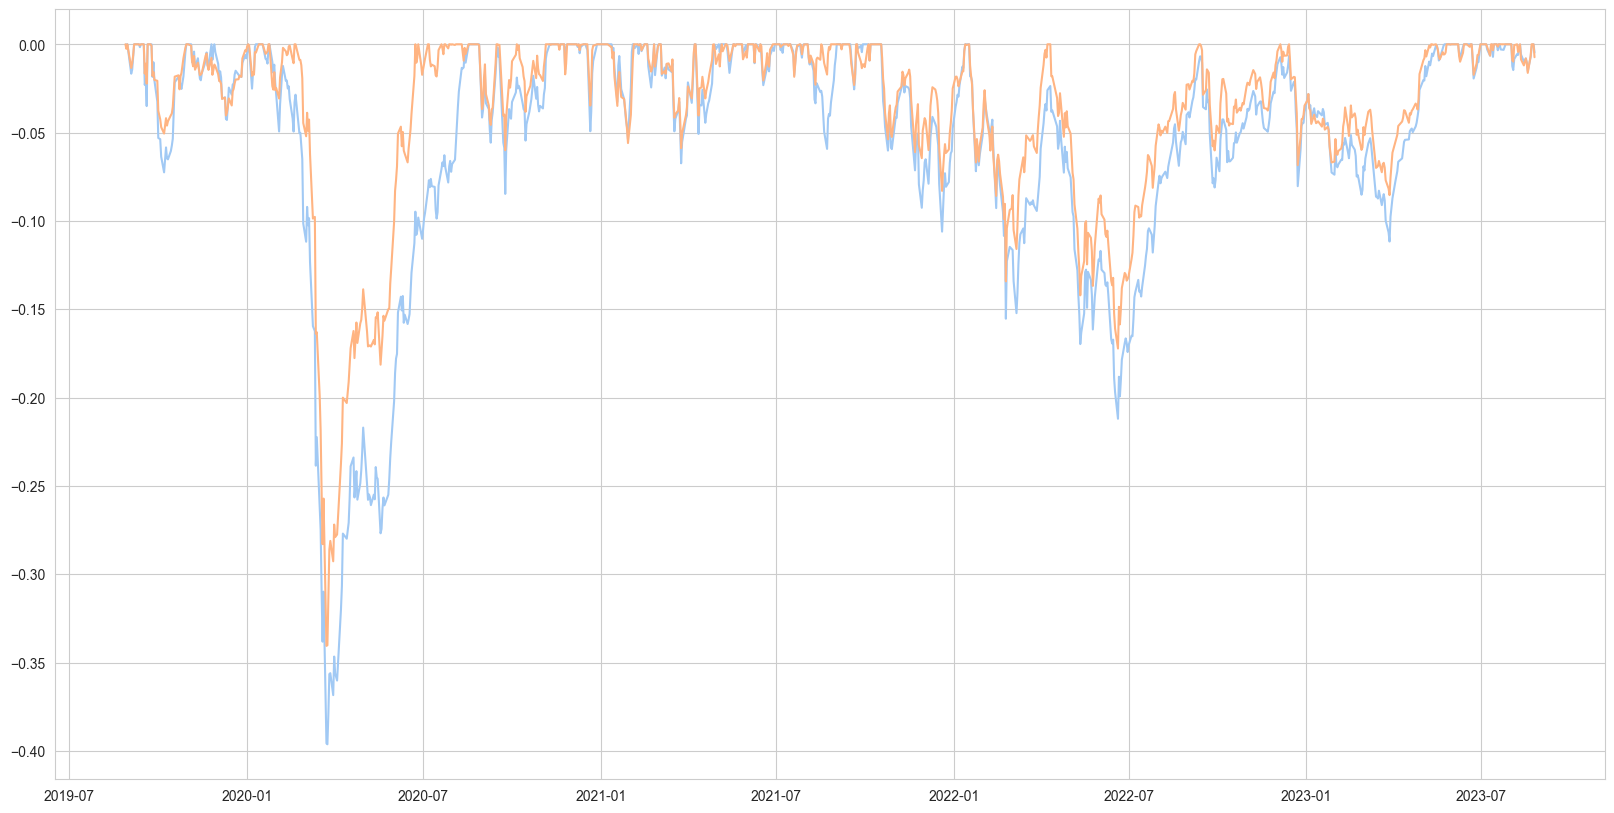

In [324]:


plt.plot(drawdown(cumulative_returns_market), label='Market')
plt.plot(drawdown(cumulative_returns_portfolio), label='De-correlated Portfolio')

print(f"The Maximum drawdown for the market was {drawdown(cumulative_returns_market).min()*100:.2f}% and for the de-correlated portfolio was {drawdown(cumulative_returns_portfolio).min()*100:.2f}%.")


# Challenges of Portfolio Allocation and Selection using Graph Theory

### Changing Correlations

One of the significant challenges when using graph theory for portfolio allocation is the dynamic nature of correlations. Correlations between assets can change over time due to market shifts, economic events, or other external factors. This volatility can lead to suboptimal portfolio performance as assumptions based on historical correlations become unreliable.

### Inaccurate Assumptions

Graph theory relies on historical data to establish correlations between assets. However, using past correlations to predict future relationships assumes that market conditions and asset behaviors will remain consistent. In reality, financial markets are influenced by evolving factors that can render these assumptions inaccurate.

### Limited Consideration of Other Factors

Graph theory primarily focuses on correlations as the basis for selecting assets. However, other critical factors like risk tolerance, liquidity, and fundamental analysis are not fully integrated into this approach. Relying solely on correlations might overlook assets with valuable characteristics outside the correlation framework.

## Potential Solutions

### Dynamic Portfolio Rebalancing

To address changing correlations, dynamic portfolio rebalancing strategies can be employed. These strategies continuously monitor correlations and adjust the portfolio allocation accordingly. By embracing flexibility, these approaches aim to capture changing market dynamics and improve performance.

### Factor-Based Approaches

Integrating factor-based models with graph theory can provide a more comprehensive view of asset selection. Factors such as value, size, momentum, and quality can guide the selection process beyond correlations alone. This approach diversifies the portfolio based on multiple dimensions.

### Stress Testing and Scenario Analysis

Stress testing the portfolio under various correlation scenarios can enhance its resilience. By analyzing how the portfolio performs under different correlation environments, investors can better understand potential risks and make informed decisions.



In [325]:
ticker1='TATAMOTORS.NS'
ticker2='TATAMTRDVR.NS'

In [326]:
stock1=yf.download(tickers=ticker1,start='2016-01-01')['Close']
stock2=yf.download(tickers=ticker2,start='2016-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


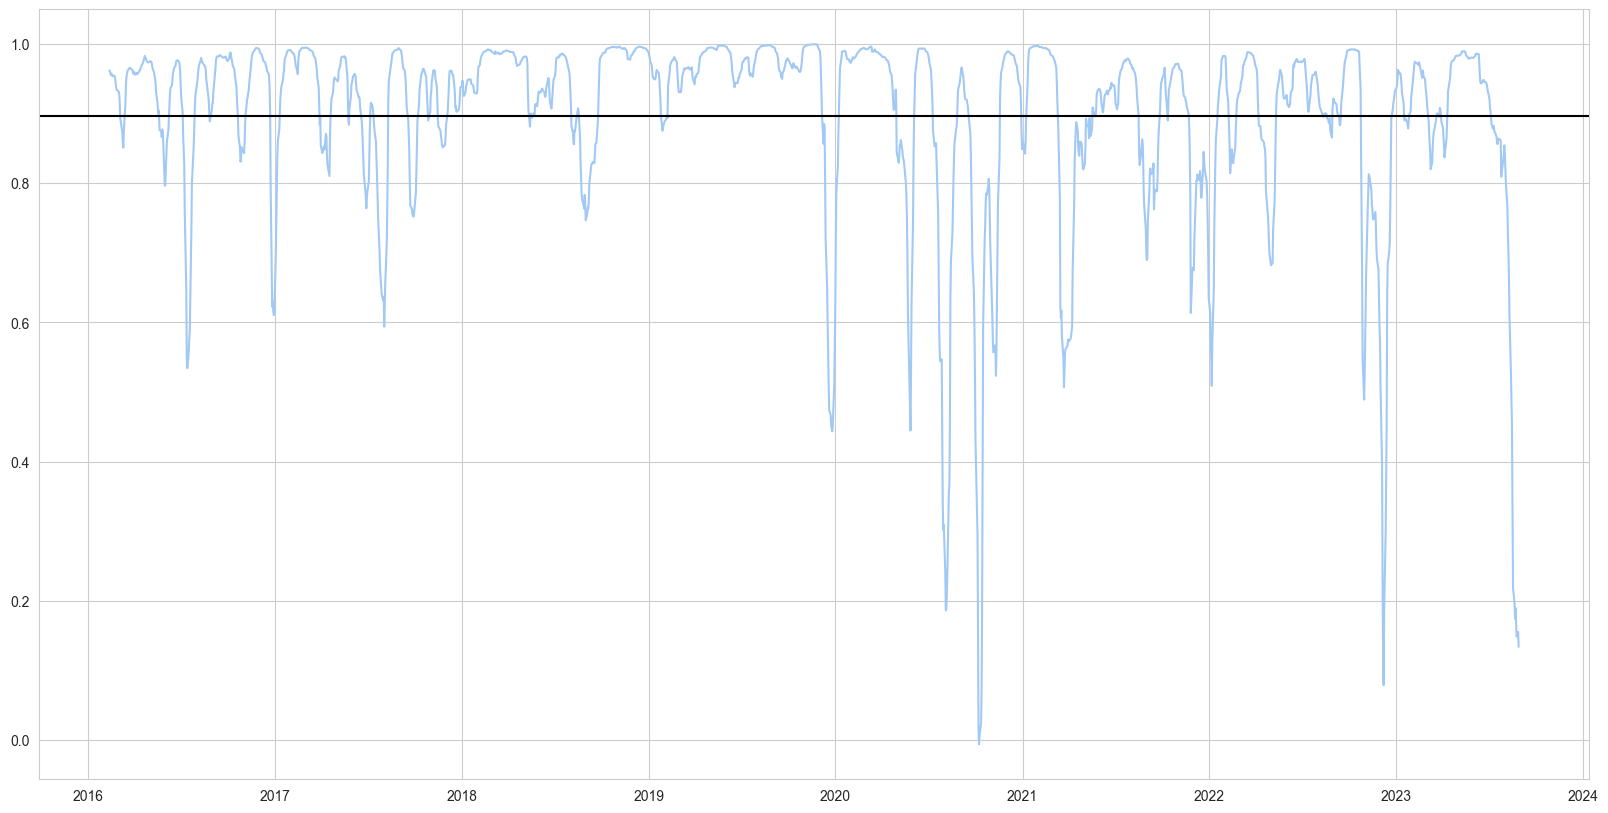

In [327]:
rolling_correlation = stock1.rolling(window=30).corr(stock2)
plt.plot(rolling_correlation)
rolling_mean = rolling_correlation.mean()

plt.axhline(y=rolling_mean, color='black', linestyle='-', label='Mean Correlation')


# Further Exploration

In this section, we'll explore additional aspects related to graph analysis, subgraph identification, and optimization.

## Computation Efficiency

Building graphs and finding subgraphs can be a computationally intensive task, especially for large datasets. In our Python-based approach, the algorithm can be slow due to Python's interpreted nature. A potential improvement is to implement this algorithm using a lower-level language like C++. This can significantly enhance performance and reduce execution time, making it feasible to work with much larger datasets.

## Backtesting Opportunities

Analyzing subgraphs can be a powerful tool for portfolio management and backtesting. By leveraging subgraph identification, you can explore portfolio rebalancing strategies over different timeframes, such as monthly, quarterly, or annually. This opens up avenues for optimizing investment portfolios based on evolving correlations and network structures.

## Selecting the Threshold Value

The choice of the threshold value when identifying subgraphs can be somewhat arbitrary and depends on the specific analysis goals. Here are some considerations:

- **Mean Correlation**: One approach is to use the mean correlation as a threshold. This value can serve as a starting point, but it may not always be the most suitable threshold for your dataset.

- **Experimentation**: Another approach is to experiment with various threshold values. You can iterate through a range of threshold values and observe how they affect the number and composition of the identified subgraphs. This empirical approach allows you to fine-tune the threshold based on your desired criteria.

- **Desired Number of Stocks**: You can set the threshold based on the desired number of stocks you want in each subgraph. This approach provides a level of control over the composition of subgraphs and can be useful in constructing diversified portfolios.

Remember that the choice of the threshold should align with your specific analytical objectives and the characteristics of your dataset. It may involve a combination of statistical analysis and domain knowledge to determine the most appropriate threshold value.

## Conclusion

Exploring graph analysis and subgraph identification offers valuable insights into complex datasets. By optimizing the computational efficiency, considering backtesting opportunities, and selecting the right threshold value, you can harness the power of network analysis to make informed decisions in various domains, including finance, social networks, and more.
